# FFNN-Inspired Model for Fashion MNIST

This guide outlines each step involved in adapting the FFNN architecture to the Fashion MNIST dataset. Adjustments are made to accommodate the smaller, grayscale input images.

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
import seaborn as sns
import joblib

In [1]:
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

> **Dataset:** Fashion MNIST, consisting of 28x28 grayscale images in 10 classes.

> **Normalization:** Images are divided by 255.0 to scale pixel values between 0 and 1.

> **Reshaping:** Reshapes each image to (28, 28, 1) to fit the input format expected by the model.

In [3]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### **Code Breakdown**

1. **Model Definition**:
   ```python
   model = Sequential([
   ```
   - A **Sequential model** is used, which allows for building the network layer-by-layer.

2. **Input Layer**:
   ```python
   Flatten(input_shape=(28, 28)),
   ```
   - **`Flatten` Layer**:
     - Converts the input data from a 2D shape of (28, 28) (e.g., an image) into a 1D vector.
     - Essential for feeding image data into fully connected (dense) layers.
   - **`input_shape=(28, 28)`**:
     - Specifies the input dimension of the data, which is 28x28 pixels (typical for datasets like MNIST).

3. **First Hidden Layer**:
   ```python
   Dense(128, activation='relu'),
   ```
   - **`Dense` Layer**:
     - Fully connected layer with 128 neurons.
     - Each neuron is connected to every neuron in the previous layer.
   - **Activation Function (`relu`)**:
     - The Rectified Linear Unit (ReLU) activation function introduces non-linearity, allowing the network to learn complex patterns.

4. **Second Hidden Layer**:
   ```python
   Dense(64, activation='relu'),
   ```
   - A second fully connected layer with 64 neurons.
   - Uses the **ReLU activation function** to retain non-linearity.

5. **Output Layer**:
   ```python
   Dense(10, activation='softmax')
   ```
   - **`Dense` Layer**:
     - The output layer has 10 neurons, corresponding to the 10 possible classes (e.g., digits 0-9 for MNIST).
   - **Activation Function (`softmax`)**:
     - Converts the output of the network into probabilities, where the sum of all probabilities is 1.
     - Used for multi-class classification tasks.


In [4]:
# Define the FFNN model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),   # Second hidden layer
    Dense(10, activation='softmax') # Output layer for 10 classes
])

D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


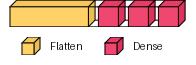

In [5]:
import visualkeras
from visualkeras import layered_view
# Visualizing model architecture
layered_view(model, legend = True)

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7681 - loss: 0.6638 - val_accuracy: 0.8439 - val_loss: 0.4409
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8566 - loss: 0.3863 - val_accuracy: 0.8590 - val_loss: 0.3930
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8749 - loss: 0.3396 - val_accuracy: 0.8703 - val_loss: 0.3443
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8839 - loss: 0.3144 - val_accuracy: 0.8648 - val_loss: 0.3574
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8886 - loss: 0.2970 - val_accuracy: 0.8801 - val_loss: 0.3349
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8938 - loss: 0.2815 - val_accuracy: 0.8814 - val_loss: 0.3225
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9000 - loss: 0.2622 - val_accuracy: 0.8838 - val_loss: 0.3192
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9053 - loss: 0.2550 - 

In [8]:
# Save the model
model.save('ffnn_fashion_mnist_model.h5')

# Load the model
model = load_model('ffnn_fashion_mnist_model.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Predict the classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.8815 - loss: 0.3531
Test accuracy: 0.8807
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step


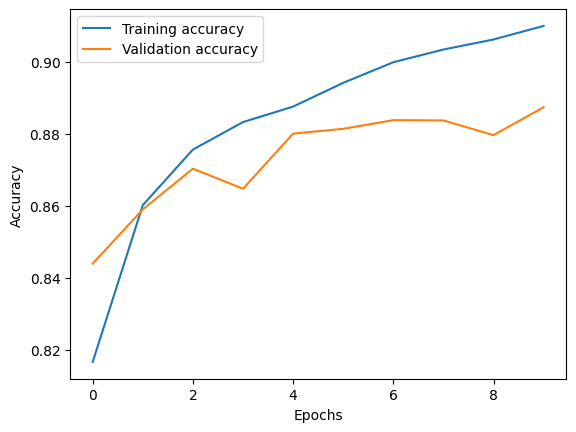

In [15]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

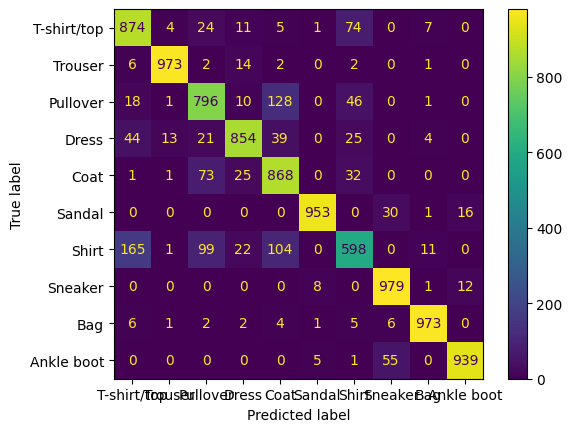

In [16]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
ConfusionMatrixDisplay(conf_matrix, display_labels=class_names).plot()
plt.show()

In [17]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.87      0.83      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.78      0.80      0.79      1000
       Dress       0.91      0.85      0.88      1000
        Coat       0.75      0.87      0.81      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.76      0.60      0.67      1000
     Sneaker       0.91      0.98      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



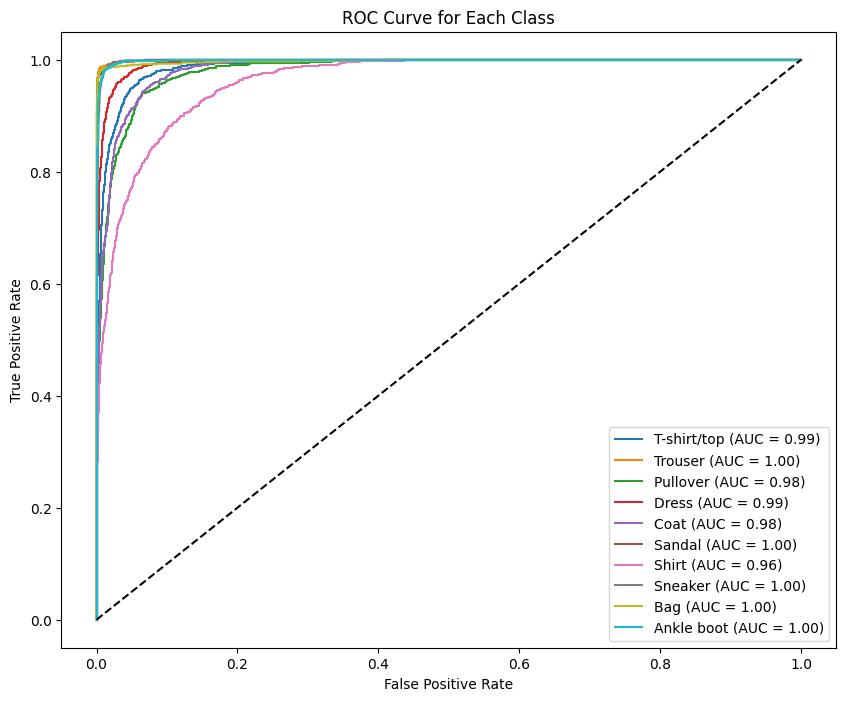

In [18]:
# ROC Curve for each class
# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()
